In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#create pandas df called 'coffee'

coffee = pd.read_csv('arabica.csv')

In [3]:
coffee.head()

,Unnamed: 0,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,...,Moisture,Category One Defects,Quakers,Color,Category Two Defects,NA,Expiration,Certification Body,Certification Address,Certification Contact
0,0,Taiwan,嵩岳咖啡莊園,202004,嵩岳咖啡莊園,NaN,TCL 台灣咖啡研究室,1200,雲林-石壁,郭亮志,...,11 %,0 full defects,0,None,0 full defects,NaN,"September 1st, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296
1,0,Kenya,NaN,1542247,Tylor Winch,037-1673-5107,Nestle Nespresso SA,1650,NaN,Tylor Winch Volcafe,...,11 %,0 full defects,0,Green,1 full defects,NaN,"October 30th, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296
2,0,Colombia,Droptop partner,Droptop Specialty Coffee Blend,NaN,NaN,Cafe Droptop,1800,colombia,Droptop partner,...,11 %,0 full defects,0,Green,0 full defects,NaN,"May 26th, 2022",Specialty Coffee Institute of Asia,"148 ULGIRO, #1309,",Sung-Yong Steven Kil - 82-10-7912-1456-English...
3,0,Ethiopia,Honey Drip,1,non,NaN,宸嶧國際有限公司,2219,Ethiopia,Honey Dip,...,11 %,0 full defects,3,Green,4 full defects,NaN,"July 14th, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,0,Colombia,Granja el Sauce,001 Tostado SW,Dry Mill/ Honey Process,NaN,Tostado SW Limited,1650,Santander Colombia,Alvaro Edgar Ramirez Jauregui,...,11 %,0 full defects,0,None,0 full defects,NaN,"September 4th, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296


In [4]:
coffee.columns

Index(['Unnamed: 0', 'Country of Origin', 'Farm Name', 'Lot Number', 'Mill',
       'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture', 'Category One Defects', 'Quakers',
       'Color', 'Category Two Defects', 'NA', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [5]:
coffee['Unnamed: 0'].unique()

array([0])

In [6]:
#drop the 'Unnamed: 0' column that just contains 0 for all rows
coffee = coffee.drop(columns=['Unnamed: 0'])

In [7]:
print(coffee['Altitude'])

0           1200
1           1650
2           1800
3           2219
4           1650
         ...    
145    1200-1300
146    1300-1800
147         1200
148         1150
149         1150
Name: Altitude, Length: 150, dtype: object


In [8]:
coffee.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country of Origin      150 non-null    object 
 1   Farm Name              142 non-null    object 
 2   Lot Number             150 non-null    object 
 3   Mill                   134 non-null    object 
 4   ICO Number             111 non-null    object 
 5   Company                150 non-null    object 
 6   Altitude               150 non-null    object 
 7   Region                 149 non-null    object 
 8   Producer               149 non-null    object 
 9   Number of Bags         150 non-null    int64  
 10  Bag Weight             150 non-null    object 
 11  In-Country Partner     150 non-null    object 
 12  Harvest Year           150 non-null    object 
 13  Grading Date           150 non-null    object 
 14  Owner                  150 non-null    object 
 15  Variet

In [9]:
coffee.Altitude.unique()

array(['1200', '1650', '1800', '2219', '15002100', '2100', '2200', '2000',
       '1950', '1276', '1300', '2229', '1040', '1994', '1420', '1700',
       '5650', '1100', '1400+', '1450', '1600', '1750', '442', '1150',
       '1666', '1300-1800', '1200-1500', '1500', '1943', '1400', '1000',
       '1020', '1250', '1901.64', '1850', '1200-1900', '-900', '1574',
       '1350', '1200-1300'], dtype=object)

## Cleaning Altitude Column (Created new column called Mean Altitude (m))

In [10]:
#find data where the altitude is written as a range of values

coffee.loc[coffee['Altitude'].str.contains('-')]

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Moisture,Category One Defects,Quakers,Color,Category Two Defects,NA,Expiration,Certification Body,Certification Address,Certification Contact
40,Guatemala,Not Specificated,11/63/712,Dry Mill of Exportcafe,NaN,Marubeni Corporation,1300-1800,Guatemala Huehuetenango,"Exportcafe, S.A.",275,...,12 %,0 full defects,1,Green,0 full defects,NaN,"September 1st, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
42,Honduras,Not specificated,13/186/048,Dry Mill of Safracafe,13/186/048,Marubeni Corporation,1200-1500,Honduras Copan,Aprocafesca,285,...,11.5 %,0 full defects,1,Green,2 full defects,NaN,"October 27th, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
75,Peru,NaN,30/543/1188,ED&F Man Volcafe Peru's dry mill in Jaen,30/543/1188,"Volcafe Limited, Japan",1200-1900,Huabal,various farmers,275,...,11.5 %,0 full defects,0,Green,2 full defects,NaN,"January 27th, 2022",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
85,Brazil,CAFEBRASCOMERCIO DE CAFÉS,CB 830/20,DRY MILL,NaN,cafebras comércio de cafes do brasil,-900,CERRADO MINEIRO,CAFRBRAS COMERCIO DE CAFÉS,300,...,11 %,0 full defects,0,Bluish-Green,0 full defects,NaN,"September 18th, 2021",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
95,Brazil,not specificated,002/1738/0120,dry mil of Cocapil cooperative,NaN,Marubeni Corporation,1200-1300,Alta Mogiana,Cocapil cooperative,440,...,11.5 %,0 full defects,2,Yellow Green,0 full defects,NaN,"December 7th, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
96,Guatemala,Not Specificated,11/63/311,Dry Mill of Exportcafe,NaN,Marubeni Corporation,1300-1800,Guatemala Huehuetenango,"Exportcafe, S.A.",275,...,12 %,0 full defects,1,Green,2 full defects,NaN,"September 1st, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
125,Peru,NaN,30/543/1188,ED&F Man Volcafe Peru's dry mill in Jaen,30/543/1188,"Volcafe Limited, Japan",1200-1900,Huabal,various farmers,275,...,11.5 %,0 full defects,0,Green,2 full defects,NaN,"January 27th, 2022",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
135,Brazil,CAFEBRASCOMERCIO DE CAFÉS,CB 830/20,DRY MILL,NaN,cafebras comércio de cafes do brasil,-900,CERRADO MINEIRO,CAFRBRAS COMERCIO DE CAFÉS,300,...,11 %,0 full defects,0,Bluish-Green,0 full defects,NaN,"September 18th, 2021",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
145,Brazil,not specificated,002/1738/0120,dry mil of Cocapil cooperative,NaN,Marubeni Corporation,1200-1300,Alta Mogiana,Cocapil cooperative,440,...,11.5 %,0 full defects,2,Yellow Green,0 full defects,NaN,"December 7th, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
146,Guatemala,Not Specificated,11/63/311,Dry Mill of Exportcafe,NaN,Marubeni Corporation,1300-1800,Guatemala Huehuetenango,"Exportcafe, S.A.",275,...,12 %,0 full defects,1,Green,2 full defects,NaN,"September 1st, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [11]:
#Turn all the number elements in the Altitude column into individual series

b = coffee['Altitude'].str.findall('(\d+)')
print(b)

0            [1200]
1            [1650]
2            [1800]
3            [2219]
4            [1650]
           ...     
145    [1200, 1300]
146    [1300, 1800]
147          [1200]
148          [1150]
149          [1150]
Name: Altitude, Length: 150, dtype: object


In [12]:
mean_altitude = pd.Series([],dtype = 'float64')
for i in range(0,len(b)):
    b[i] = np.array(b[i]).astype(np.float)
    mean_altitude[i] = sum(b[i]) / len(b[i])

In [13]:
altitude_df = mean_altitude.to_frame()

In [14]:
altitude_df.columns = ['Mean Altitude (m)']

In [15]:
altitude_df

,Mean Altitude (m)
0,1200.0
1,1650.0
2,1800.0
3,2219.0
4,1650.0
...,...
145,1250.0
146,1550.0
147,1200.0
148,1150.0


In [16]:
altitude_df[altitude_df['Mean Altitude (m)']>2000]

,Mean Altitude (m)
3,2219.0
5,15002100.0
7,2100.0
8,2100.0
9,2200.0
14,2229.0
22,5650.0


In [17]:
altitude_df.loc[5] = (1500+2100)/2

In [18]:
altitude_df.loc[5]

Mean Altitude (m)    1800.0
Name: 5, dtype: float64

In [19]:
altitude_df[altitude_df['Mean Altitude (m)']>2000]

,Mean Altitude (m)
3,2219.0
7,2100.0
8,2100.0
9,2200.0
14,2229.0
22,5650.0


(array([ 3.,  2., 37., 27., 46., 29.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 442. ,  702.4,  962.8, 1223.2, 1483.6, 1744. , 2004.4, 2264.8,
        2525.2, 2785.6, 3046. , 3306.4, 3566.8, 3827.2, 4087.6, 4348. ,
        4608.4, 4868.8, 5129.2, 5389.6, 5650. ]),
 <BarContainer object of 20 artists>)

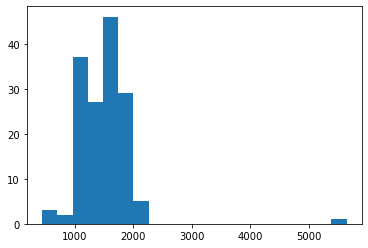

In [20]:
#it seems like row 22 with an altitude of 5650m is an outlier. Let's plot a histogram to see how it compares with the other altitudes:

plt.hist(altitude_df['Mean Altitude (m)'], bins=20)

In [21]:
#based on the histagram, row 22 needs to be checked out further.

coffee.loc[22]

Country of Origin                                                Guatemala
Farm Name                                                 SAN RAFAEL URIAS
Lot Number                                                     11/54876/01
Mill                                                   SU BENEFICIO, S. A.
ICO Number                                                     11/54876/01
Company                                                     VALBROS, S. A.
Altitude                                                              5650
Region                                                   ANTIGUA GUATEMALA
Producer                                                    VALDROS, S. A.
Number of Bags                                                          50
Bag Weight                                                           69 kg
In-Country Partner                            Asociacion Nacional Del Café
Harvest Year                                                          2021
Grading Date             

Because the max elevation in Guatemal is 4,203 meters, this altitude must be incorrect. The altitude of Antigua, Guatemala is 5,029 feet (1,533 metres), so this is likely an altitude in feet rather than meters. I will convert this altitude to feet and use the conversion. 

In [22]:
#convert altitude of the outlier from feet to meters
altitude_df.loc[22] = altitude_df.loc[22]*0.3048

In [23]:
altitude_df.loc[22]

Mean Altitude (m)    1722.12
Name: 22, dtype: float64

In [24]:
altitude_df['Mean Altitude (m)'].sort_values()

38      442.0
41      442.0
31      442.0
85      900.0
135     900.0
        ...  
7      2100.0
8      2100.0
9      2200.0
3      2219.0
14     2229.0
Name: Mean Altitude (m), Length: 150, dtype: float64

(array([ 3.,  0.,  0.,  2.,  8., 18., 15.,  9., 22., 21., 22., 20.,  3.,
         4.,  3.]),
 array([ 442.        ,  561.13333333,  680.26666667,  799.4       ,
         918.53333333, 1037.66666667, 1156.8       , 1275.93333333,
        1395.06666667, 1514.2       , 1633.33333333, 1752.46666667,
        1871.6       , 1990.73333333, 2109.86666667, 2229.        ]),
 <BarContainer object of 15 artists>)

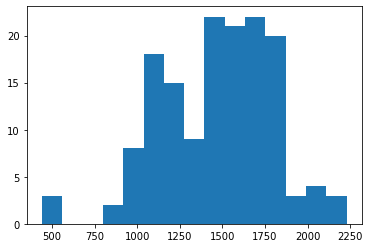

In [25]:
plt.hist(altitude_df['Mean Altitude (m)'], bins=15)

In [26]:
coffee['Mean Altitude (m)'] = altitude_df['Mean Altitude (m)']

## Cleaning Harvest Year Column

In [27]:
#check out values in Harvest Year Column

coffee["Harvest Year"].unique()

array(['2020', '2019', '2021', '2020 / 2021'], dtype=object)

In [28]:
#change "2020/2021" to be "2021"

coffee.loc[coffee["Harvest Year"] == "2020 / 2021", "Harvest Year"] = "2021"


In [29]:
#check changes

coffee["Harvest Year"].unique()

array(['2020', '2019', '2021'], dtype=object)

## Cleaning Color Column

In [30]:
coffee.Color.unique()

array(['None', 'Green', 'greenish', 'Yellow Green', 'Blue-Green',
       'Bluish-Green', 'Greenish', 'yellow-green'], dtype=object)

In [31]:
#consolodate color categories to Green, Blue-Green, Yellow-Green, or Greenish

coffee['Color'] = coffee['Color'].str.replace('Bluish-Green', 'Blue-Green')
coffee['Color'] = coffee['Color'].str.replace('yellow-green', 'Yellow-Green')
coffee['Color'] = coffee['Color'].str.replace('Yellow Green', 'Yellow-Green')
coffee['Color'] = coffee['Color'].str.replace('greenish', 'Green')


In [32]:
coffee.Color.unique()

array(['None', 'Green', 'Yellow-Green', 'Blue-Green', 'Greenish'],
      dtype=object)

## Cleaning Category One Defects and Category Two Defects Columns

In [33]:
coffee['Category One Defects'].unique()

array(['0 full defects', '1 full defects'], dtype=object)

In [34]:
coffee['Category Two Defects'].unique()

array(['0 full defects', '1 full defects', '4 full defects',
       '3 full defects', '5 full defects', '7 full defects',
       '2 full defects', '6 full defects', '9 full defects',
       '8 full defects', '16 full defects'], dtype=object)

In [35]:
coffee.loc[coffee['Category One Defects'].str.contains('full defects')].count()

Country of Origin        150
Farm Name                142
Lot Number               150
Mill                     134
ICO Number               111
Company                  150
Altitude                 150
Region                   149
Producer                 149
Number of Bags           150
Bag Weight               150
In-Country Partner       150
Harvest Year             150
Grading Date             150
Owner                    150
Variety                  150
Status                   150
Processing Method        150
Aroma                    150
Flavor                   150
Aftertaste               150
Acidity                  150
Body                     150
Balance                  150
Uniformity               150
Clean Cup                150
Sweetness                150
Overall                  150
Defects                  150
Total Cup Points         150
Moisture                 150
Category One Defects     150
Quakers                  150
Color                    150
Category Two D

In [36]:
coffee.loc[coffee['Category Two Defects'].str.contains('full defects')].count()

Country of Origin        150
Farm Name                142
Lot Number               150
Mill                     134
ICO Number               111
Company                  150
Altitude                 150
Region                   149
Producer                 149
Number of Bags           150
Bag Weight               150
In-Country Partner       150
Harvest Year             150
Grading Date             150
Owner                    150
Variety                  150
Status                   150
Processing Method        150
Aroma                    150
Flavor                   150
Aftertaste               150
Acidity                  150
Body                     150
Balance                  150
Uniformity               150
Clean Cup                150
Sweetness                150
Overall                  150
Defects                  150
Total Cup Points         150
Moisture                 150
Category One Defects     150
Quakers                  150
Color                    150
Category Two D

In [37]:
#Every single row contains the term 'full defects' in the Cat One and Cat Two defects columns so I can just delete that phrase from all entries

coffee['Category One Defects'] = coffee['Category One Defects'].str.replace('full defects', '')
coffee['Category Two Defects'] = coffee['Category Two Defects'].str.replace('full defects', '')

In [38]:
#check updated Cat One and Cat Two Defects values:

print('Cat One Defects Values:', coffee['Category One Defects'].unique())
print('Cat Two Defects Values:', coffee['Category Two Defects'].unique())

Cat One Defects Values: ['0 ' '1 ']
Cat Two Defects Values: ['0 ' '1 ' '4 ' '3 ' '5 ' '7 ' '2 ' '6 ' '9 ' '8 ' '16 ']


In [39]:
#convert both columns (object) into numeric (int64) types

coffee["Category One Defects"] = pd.to_numeric(coffee["Category One Defects"])
coffee["Category Two Defects"] = pd.to_numeric(coffee["Category Two Defects"])

In [40]:
#check updated Cat One and Cat Two Data Types

print('Cat One Data Type:' , coffee['Category One Defects'].dtypes)
print('Cat Two Data Type:' , coffee['Category Two Defects'].dtypes)

Cat One Data Type: int64
Cat Two Data Type: int64


## Checking Numerical Values (Judging Criteria)

In [41]:
judging_criteria = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points']

In [42]:
#judging criteria scores should range from 0-10, other than Total Cup Points which should range from 0-100.
#check to see if values in these columns fall in the correct ranges and if there's any missing data:
for i in judging_criteria:
    print(i, 'max =' , coffee[i].max())
    print(i, 'min =' , coffee[i].min())
    print(i, 'NaN count =' , coffee[i].isna().sum())

Aroma max = 8.58
Aroma min = 7.5
Aroma NaN count = 0
Flavor max = 8.67
Flavor min = 7.42
Flavor NaN count = 0
Aftertaste max = 8.25
Aftertaste min = 7.0
Aftertaste NaN count = 0
Acidity max = 8.67
Acidity min = 7.25
Acidity NaN count = 0
Body max = 8.5
Body min = 7.25
Body NaN count = 0
Balance max = 8.58
Balance min = 7.33
Balance NaN count = 0
Uniformity max = 10.0
Uniformity min = 9.33
Uniformity NaN count = 0
Clean Cup max = 10.0
Clean Cup min = 10.0
Clean Cup NaN count = 0
Sweetness max = 10.0
Sweetness min = 10.0
Sweetness NaN count = 0
Overall max = 8.83
Overall min = 7.42
Overall NaN count = 0
Defects max = 0.0
Defects min = 0.0
Defects NaN count = 0
Total Cup Points max = 89.25
Total Cup Points min = 82.25
Total Cup Points NaN count = 0


All of the values are present and reasonable (numbers between 0-10 for the judging critera). I also notice that all values have a clean cup score of 10 and a defects score of 0.

## Cleaning Moisture Column

In [43]:
coffee['Moisture'].unique()

array(['11 %', '11.5 %', '12 %', '10 %', '10.5 %', '8.6 %', '13.3 %',
       '13.5 %', '9.7 %', '10.9 %', '0 %', '11.8 %', '10.6 %', '10.4 %',
       '11.6 %', '10.3 %', '9.9 %', '11.9 %', '10.8 %', '12.3 %',
       '11.3 %'], dtype=object)

In [44]:
#delete all percent signs
coffee['Moisture'] = coffee['Moisture'].str.replace(' %', '')

In [45]:
#convert 'Moisture' values from strings to floats
coffee["Moisture"] = pd.to_numeric(coffee["Moisture"])

In [46]:
#check values and data type of updated Moisture column
print(coffee['Moisture'].unique())
print(coffee['Moisture'].dtypes)

[11.  11.5 12.  10.  10.5  8.6 13.3 13.5  9.7 10.9  0.  11.8 10.6 10.4
 11.6 10.3  9.9 11.9 10.8 12.3 11.3]
float64


## Check out Processing Method Column

In [ ]:
#check entries for Processing Method. Nothing to clean here.
coffee['Processing Method'].unique()

## Create Total_Defects and Coffee_Grade Columns

In [47]:
#because we will be trying to predict the coffee grade which is based on number of defects, we will create a total defects column:

coffee['Total_Defects'] = coffee["Category One Defects"].astype(int).values + coffee["Category Two Defects"].astype(int).values

In [48]:
coffee['Total_Defects'].unique()

array([ 0,  1,  4,  3,  5,  7,  2,  6,  9,  8, 16])

In [49]:
coffee['Total_Defects'].value_counts()

0     33
5     21
2     21
4     20
1     18
3     12
7      9
9      6
6      6
16     2
8      2
Name: Total_Defects, dtype: int64

We can see here that most coffees had less than 6 total defects, though there are some with higher amounts. The highest amount of defects is 16 so we can limit our coffee grades of this dataset to be either Grade 1: Specialty, Grade 2: Premium, Grade 3: Exchange, and Grade 4: Standard. 

In [52]:
#create Coffee_Grade column based on the grading criteria for coffee grades: https://coffeebeansdelivered.com.au/blog/coffee-beans-graded/
def CoffeeGrade(df):

    if (df['Total_Defects'] <= 3) and (df['Quakers'] <= 0):
        return 'Specialty'
    elif (df['Total_Defects'] <= 8) and (1 <= df['Quakers'] <=3):
        return 'Premium'
    elif (9 <= df['Total_Defects'] <= 23) and (df['Quakers'] <= 5):
        return 'Exchange'
    else:
        return 'Standard Grade'

coffee['Coffee_Grade'] = coffee.apply(CoffeeGrade, axis = 1)
coffee.head()

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Color,Category Two Defects,NA,Expiration,Certification Body,Certification Address,Certification Contact,Mean Altitude (m),Total_Defects,Coffee_Grade
0,Taiwan,嵩岳咖啡莊園,202004,嵩岳咖啡莊園,NaN,TCL 台灣咖啡研究室,1200,雲林-石壁,郭亮志,3,...,None,0,NaN,"September 1st, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296,1200.0,0,Specialty
1,Kenya,NaN,1542247,Tylor Winch,037-1673-5107,Nestle Nespresso SA,1650,NaN,Tylor Winch Volcafe,320,...,Green,1,NaN,"October 30th, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296,1650.0,1,Specialty
2,Colombia,Droptop partner,Droptop Specialty Coffee Blend,NaN,NaN,Cafe Droptop,1800,colombia,Droptop partner,159,...,Green,0,NaN,"May 26th, 2022",Specialty Coffee Institute of Asia,"148 ULGIRO, #1309,",Sung-Yong Steven Kil - 82-10-7912-1456-English...,1800.0,0,Specialty
3,Ethiopia,Honey Drip,1,non,NaN,宸嶧國際有限公司,2219,Ethiopia,Honey Dip,37,...,Green,4,NaN,"July 14th, 2021",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,2219.0,4,Premium
4,Colombia,Granja el Sauce,001 Tostado SW,Dry Mill/ Honey Process,NaN,Tostado SW Limited,1650,Santander Colombia,Alvaro Edgar Ramirez Jauregui,1,...,None,0,NaN,"September 4th, 2021",NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Gloria Pedroza - +41417287296,1650.0,0,Specialty


In [60]:
#check out value counts for our Coffee Grades
coffee.Coffee_Grade.value_counts()

Premium           64
Specialty         58
Standard Grade    22
Exchange           6
Name: Coffee_Grade, dtype: int64

In [62]:
#it looks like we only have 6 coffees that are Grade 4: Exchange. Let's look at the rows of these coffees:
coffee.loc[coffee['Coffee_Grade'] == 'Exchange']

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Color,Category Two Defects,NA,Expiration,Certification Body,Certification Address,Certification Contact,Mean Altitude (m),Total_Defects,Coffee_Grade
54,Honduras,Beneficio Santa Rosa,80,Beneficio,13123077,Beneficio Santa Rosa,1250,Copán,Beneficio Santa Rosa,260,...,Green,9,NaN,"April 8th, 2022",Instituto Hondureño del Café,Laboratorio de Control de Calidad de Café ( CN...,Ramon Reyes - + 504 9693-9042,1250.0,9,Exchange
72,Guatemala,VARIAS FINCAS,11/15/115,VARIOS BENEFICIOS,11/15/115,"PETER SCHOENFELD, S. A.",1600,HUEHUETENANGO,VARIOS PRODUCTORES,250,...,Green,16,NaN,"April 29th, 2022",Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,1600.0,16,Exchange
84,Mexico,Teresa,682,Exportadora de Cafe CAlifornia,VER-bc-000199 B07-2A-C23,Exportadora Café California,1700,Chiapas Villa Corzo,various,250,...,Green,9,NaN,"March 23rd, 2022",Centro Agroecológico del Café A.C.,"Instituto de Ecología A. C., Campus III Edific...",Stephany Escamilla Femat - Tel. +52 228 842180...,1700.0,9,Exchange
104,Honduras,Beneficio Santa Rosa,80,Beneficio,13123077,Beneficio Santa Rosa,1250,Copán,Beneficio Santa Rosa,260,...,Green,9,NaN,"April 8th, 2022",Instituto Hondureño del Café,Laboratorio de Control de Calidad de Café ( CN...,Ramon Reyes - + 504 9693-9042,1250.0,9,Exchange
122,Guatemala,VARIAS FINCAS,11/15/115,VARIOS BENEFICIOS,11/15/115,"PETER SCHOENFELD, S. A.",1600,HUEHUETENANGO,VARIOS PRODUCTORES,250,...,Green,16,NaN,"April 29th, 2022",Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,1600.0,16,Exchange
134,Mexico,Teresa,682,Exportadora de Cafe CAlifornia,VER-bc-000199 B07-2A-C23,Exportadora Café California,1700,Chiapas Villa Corzo,various,250,...,Green,9,NaN,"March 23rd, 2022",Centro Agroecológico del Café A.C.,"Instituto de Ecología A. C., Campus III Edific...",Stephany Escamilla Femat - Tel. +52 228 842180...,1700.0,9,Exchange


## Creating new, cleaned df (coffee2) with only applicable columns

In [56]:
coffee2 = coffee[['Country of Origin','Variety', 'Mean Altitude (m)','Processing Method', 'Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean Cup','Sweetness','Overall','Total Cup Points','Moisture','Color','Quakers', 'Total_Defects','Coffee_Grade']]




In [57]:
coffee2.head()

,Country of Origin,Variety,Mean Altitude (m),Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture,Color,Quakers,Total_Defects,Coffee_Grade
0,Taiwan,Gesha,1200.0,Natural / Dry,8.58,8.67,8.17,8.25,8.50,8.58,10.0,10.0,10.0,8.50,89.25,11.0,None,0,0,Specialty
1,Kenya,SL28,1650.0,Washed / Wet,8.33,8.50,8.25,8.67,8.42,8.42,10.0,10.0,10.0,8.58,89.17,11.0,Green,0,1,Specialty
2,Colombia,Typica,1800.0,Washed / Wet,8.17,8.33,8.25,8.25,8.17,8.17,10.0,10.0,10.0,8.83,88.17,11.0,Green,0,0,Specialty
3,Ethiopia,Ethiopian Heirlooms,2219.0,Other,8.25,8.25,7.92,8.42,7.92,8.08,10.0,10.0,10.0,8.33,87.17,11.0,Green,3,4,Premium
4,Colombia,Other,1650.0,Pulped natural / honey,8.33,8.08,7.75,8.33,8.17,8.17,10.0,10.0,10.0,8.25,87.08,11.0,None,0,0,Specialty


In [64]:
#check our new dataframe to make sure we have no NaN values and that the dtypes look good:
coffee2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country of Origin  150 non-null    object 
 1   Variety            150 non-null    object 
 2   Mean Altitude (m)  150 non-null    float64
 3   Processing Method  150 non-null    object 
 4   Aroma              150 non-null    float64
 5   Flavor             150 non-null    float64
 6   Aftertaste         150 non-null    float64
 7   Acidity            150 non-null    float64
 8   Body               150 non-null    float64
 9   Balance            150 non-null    float64
 10  Uniformity         150 non-null    float64
 11  Clean Cup          150 non-null    float64
 12  Sweetness          150 non-null    float64
 13  Overall            150 non-null    float64
 14  Total Cup Points   150 non-null    float64
 15  Moisture           150 non-null    float64
 16  Color              150 non

In [166]:
coffee2.to_csv('coffee_cleaned.csv')

## EDA

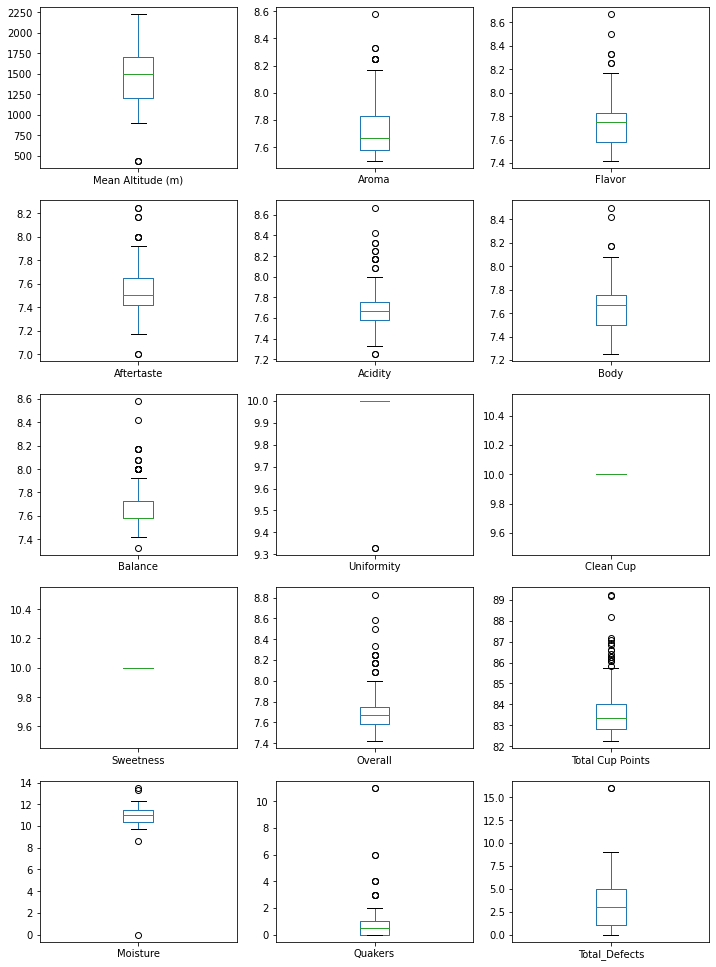

In [65]:
#create box plots of applicable data


coffee2.plot(kind='box', subplots=True, layout=(10,3), 
        sharex=False, sharey=False, figsize=(12,35))

plt.show()

Text(0.5, 0, 'Count')

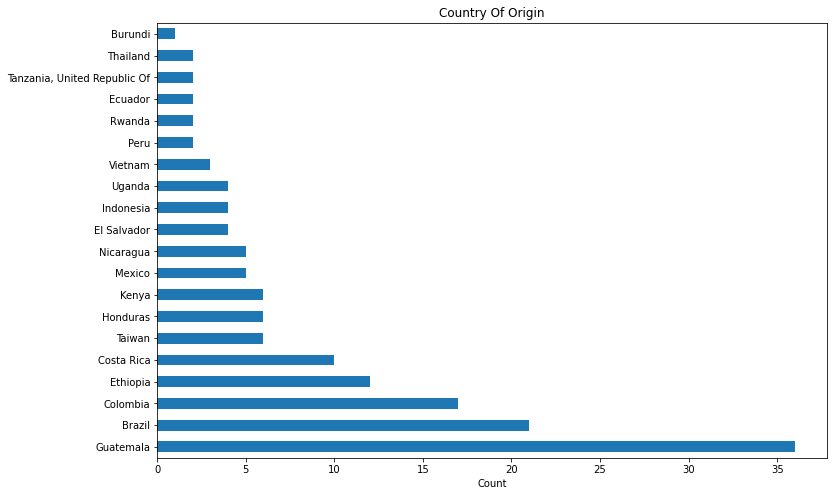

In [66]:
#create bar graph of how many coffee beans we have from each country

coffee['Country of Origin'].value_counts().plot(kind='barh', width = .5, figsize = (12,8))
plt.title('Country Of Origin')
plt.xlabel('Count')

Because we have such a small dataset, there are many countries that contain less than 5 graded coffees in our data. We will consolodate these countries into an 'Other' category later.

In [67]:
#lets look at the mean Total Cup Points of each country

country_cup_points_means = coffee.groupby('Country of Origin')[['Total Cup Points']].mean().sort_values(by='Total Cup Points', ascending=False)
country_cup_points_means

,Total Cup Points
Country of Origin,
Ethiopia,86.020833
Taiwan,85.875000
Kenya,85.276667
"Tanzania, United Republic Of",84.665000
Burundi,84.080000
Vietnam,84.056667
Colombia,84.010000
Rwanda,83.500000
Uganda,83.500000


## How does Coffee Variety affect Total Cup Points?

Text(0.5, 0, 'Count')

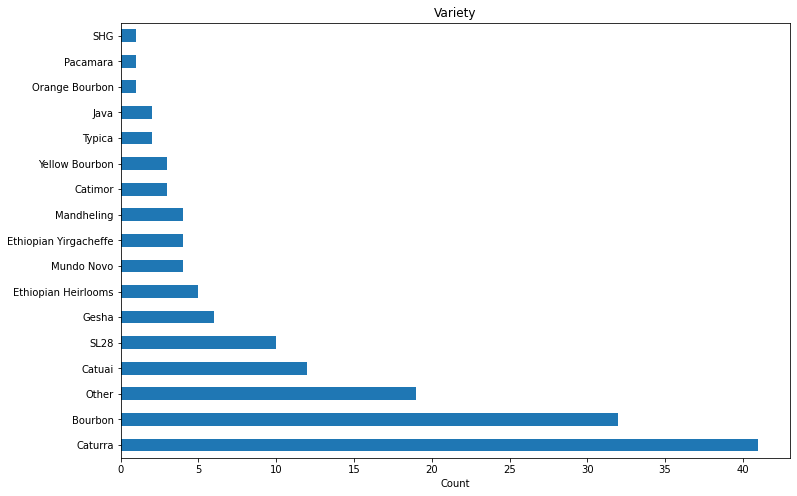

In [70]:
coffee['Variety'].value_counts().plot(kind='barh', width = .5, figsize = (12,8))
plt.title('Variety')
plt.xlabel('Count')

## How Does Coffee Variety Affect Total_Defects and Quakers?

In [100]:
mean_variety = coffee2.groupby("Variety").mean().sort_values("Total_Defects")

Text(0, 0.5, 'Defects plus quakers')

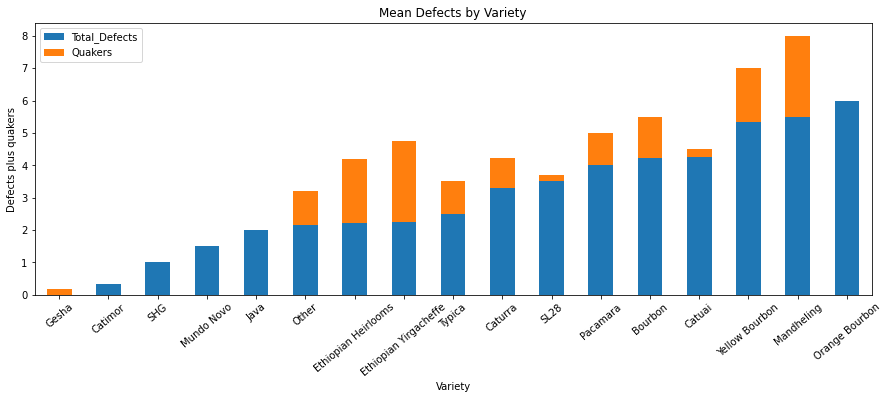

In [95]:
mean_variety.plot.bar(y=['Total_Defects','Quakers'], rot=40, figsize=(15,5), stacked=True)
plt.title("Mean Defects by Variety")
plt.ylabel('Defects plus quakers')

Looks like the varieties with the least amount of defects and quakers are Gesha, Catimor, SHG, Mundo Novo, and Java. 

## How Does Coffee Variety Affect Total Cup Points?

Text(0, 0.5, 'Total Cup Points')

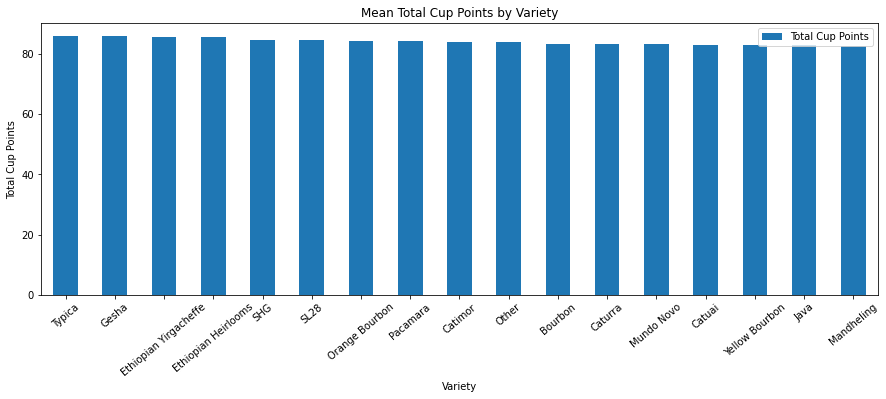

In [107]:
mean_variety2 = coffee2.groupby("Variety").mean().sort_values("Total Cup Points",ascending=False)
mean_variety2.plot.bar(y=['Total Cup Points'], rot=40, figsize=(15,5), stacked=True)
plt.title("Mean Total Cup Points by Variety")
plt.ylabel('Total Cup Points')

In [152]:
chart2 = pd.crosstab(coffee2['Variety'],coffee2['Coffee_Grade']).apply(lambda r: r/r.sum(), axis=1)
chart2

Coffee_Grade,Exchange,Premium,Specialty,Standard Grade
Variety,,,,
Bourbon,0.000000,0.468750,0.343750,0.1875
Catimor,0.000000,0.000000,1.000000,0.0000
Catuai,0.166667,0.083333,0.250000,0.5000
Caturra,0.097561,0.536585,0.365854,0.0000
Ethiopian Heirlooms,0.000000,0.400000,0.400000,0.2000
Ethiopian Yirgacheffe,0.000000,0.000000,0.250000,0.7500
Gesha,0.000000,0.166667,0.833333,0.0000
Java,0.000000,0.000000,1.000000,0.0000
Mandheling,0.000000,0.500000,0.000000,0.5000


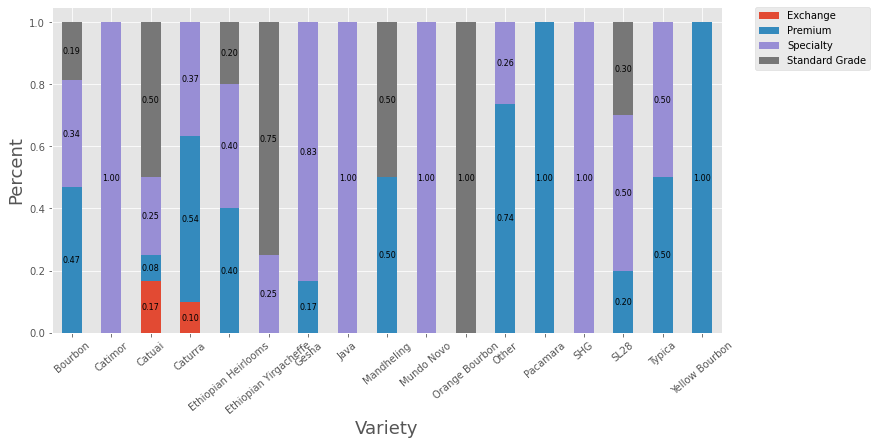

In [165]:
plt.style.use('ggplot')
ax = chart2.plot(kind='bar', stacked=True, figsize=(12, 6), rot=40, xlabel='Variety', ylabel='Percent')
   
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

     # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Percent", fontsize=18)
ax.set_xlabel("Variety", fontsize=18)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 10.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 10.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 10.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='Mean Altitude (m)', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Aroma', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Flavor', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Aftertaste', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Acidity', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Body', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Balance', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Uniformity', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Clean Cup', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Sweetness', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Overall', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Total Cup Points', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Moisture', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Quakers', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xla

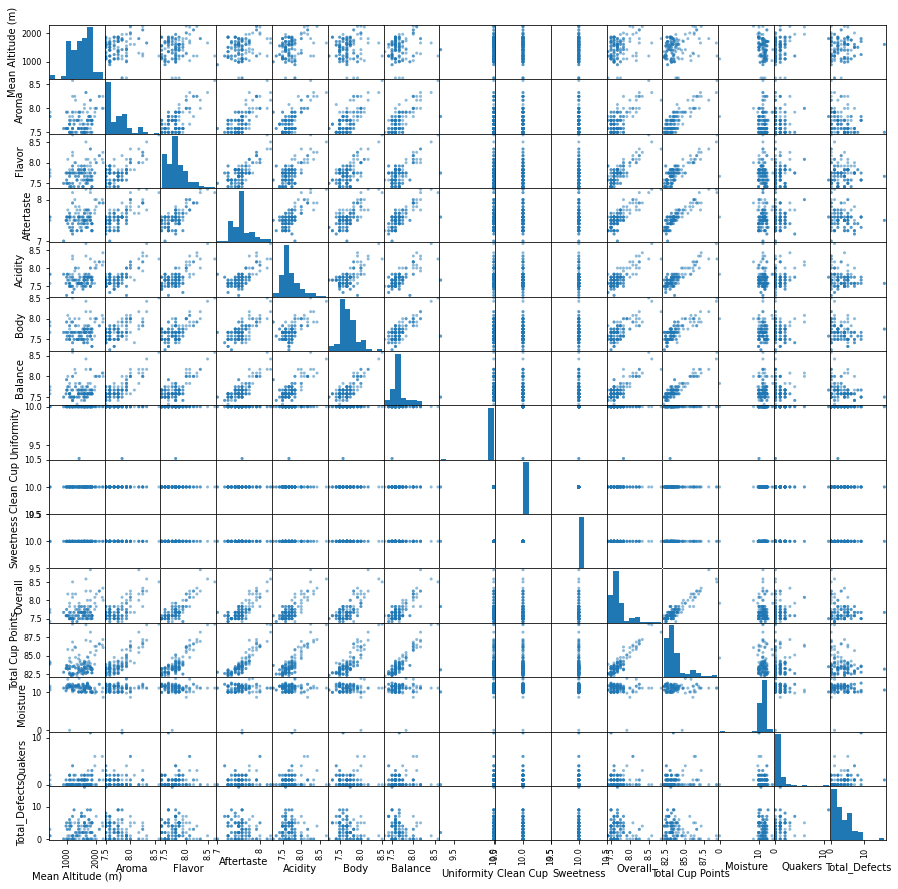

In [68]:
#plot the scatter matrix to see 
pd.plotting.scatter_matrix(coffee2, figsize=(15,15))

In [69]:
cormat = coffee2.corr()
round(cormat,2)

,Mean Altitude (m),Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture,Quakers,Total_Defects
Mean Altitude (m),1.00,0.19,0.21,0.26,0.30,0.09,0.18,0.02,NaN,NaN,0.28,0.25,-0.13,0.24,0.13
Aroma,0.19,1.00,0.65,0.70,0.70,0.65,0.79,-0.06,NaN,NaN,0.70,0.85,-0.01,-0.00,-0.28
Flavor,0.21,0.65,1.00,0.70,0.66,0.63,0.70,-0.01,NaN,NaN,0.82,0.85,-0.07,0.02,-0.07
Aftertaste,0.26,0.70,0.70,1.00,0.68,0.69,0.81,-0.02,NaN,NaN,0.78,0.88,0.03,0.07,-0.18
Acidity,0.30,0.70,0.66,0.68,1.00,0.59,0.74,0.02,NaN,NaN,0.78,0.85,-0.06,0.14,-0.15
Body,0.09,0.65,0.63,0.69,0.59,1.00,0.79,0.06,NaN,NaN,0.72,0.83,-0.09,-0.07,-0.23
Balance,0.18,0.79,0.70,0.81,0.74,0.79,1.00,0.10,NaN,NaN,0.81,0.92,-0.03,0.00,-0.29
Uniformity,0.02,-0.06,-0.01,-0.02,0.02,0.06,0.10,1.00,NaN,NaN,-0.06,0.06,0.09,0.07,0.05
Clean Cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sweetness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lump them as others
number of defects- new variable/column: (Grade)
model building- start off with linear regression
try random forest (balancing the data?)
try gradient boosting
try catboost